k = 1
Average accuracy: 95.57293750925774%
k = 2
Average accuracy: 94.3332216879406%
k = 3
Average accuracy: 96.16531214481965%
k = 4
Average accuracy: 95.514841982298%
k = 5
Average accuracy: 95.67008859105799%
k = 6
Average accuracy: 96.18496126966079%
k = 7
Average accuracy: 96.01336613337801%
k = 8
Average accuracy: 95.90665042550859%
k = 9
Average accuracy: 96.47718835087788%
k = 10
Average accuracy: 96.21460181441061%
k = 11
Average accuracy: 96.44494828229978%
k = 12
Average accuracy: 96.5689062381926%
k = 13
Average accuracy: 96.14257227963637%
k = 14
Average accuracy: 96.01225115164078%
k = 15
Average accuracy: 96.26769502340908%
k = 16
Average accuracy: 96.00866089345116%
k = 17
Average accuracy: 95.43118659847336%
k = 18
Average accuracy: 95.74282219540122%
k = 19
Average accuracy: 95.14499321125234%
k = 20
Average accuracy: 94.4137035044435%


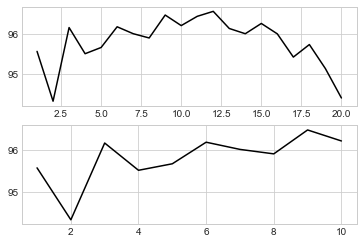

In [2]:
import csv
import random
import math
import operator
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa','Iris-versicolor','Iris-virginica'])

%matplotlib inline

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
	with open(filename, 'r') as csvfile:
	    lines = csv.reader(csvfile)
	    dataset = list(lines)
	    for x in range(len(dataset)-1):
	        for y in range(4):
	            dataset[x][y] = float(dataset[x][y])
	        if random.random() < split:
	            trainingSet.append(dataset[x])
	        else:
	            testSet.append(dataset[x])

def main():
	avgAcc = []
	for k in range (1,21):
		print('k = ' + repr(k))
		totalAcc = 0
		for n in range (1,101):
			# prepare data
			trainingSet=[]
			testSet=[]
			split = 0.67
			loadDataset('iris.data', split, trainingSet, testSet)
			trainX = np.asarray(trainingSet)
			trainy = np.asarray(trainingSet)
			testX = np.asarray(testSet)
			testy = np.asarray(testSet)
			trainX = np.delete(trainX,4,1)
			trainy = np.delete(trainy,[0,1,2,3],1)
			testX = np.delete(testX,4,1)
			testy = np.delete(testy,[0,1,2,3],1)
			trainy = le.transform(trainy.ravel())
			testy = le.transform(testy.ravel())
			trainX = trainX.astype(np.float64)
			trainy = trainy.astype(np.float64)
			testX = testX.astype(np.float64)
			testy = testy.astype(np.float64)
			#print 'Train set: ' + repr(len(trainingSet))
			#print 'Test set: ' + repr(len(testSet))
			# generate predictions
			knn = KNeighborsClassifier(k)
			knn.fit(trainX,trainy)
			totalAcc += knn.score(testX,testy)
		avgAcc.append(totalAcc)
		print('Average accuracy: ' + repr(avgAcc[k-1]) + '%')
	np.linspace(1,20,100)
	fig = plt.figure()
	plt.subplot(2,1,1)
	plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],avgAcc,'-k')
	np.linspace(1,10,100)
	plt.subplot(2,1,2)
	plt.plot([1,2,3,4,5,6,7,8,9,10],avgAcc[0:10],'-k')
	#accuracy = getAccuracy(testSet, predictions)
	#print('Accuracy: ' + repr(accuracy) + '%')
	
main()